installing necessary python libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [5]:
train1=pd.read_csv("/home/lenovo/Downloads/Documents/new/train.csv")
meal=pd.read_csv("/home/lenovo/Downloads/Documents/new/meal_info.csv")
fu=pd.read_csv("/home/lenovo/Downloads/Documents/new/fulfilment_center_info.csv")

In [6]:
meal.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [7]:
fu.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [8]:
train1.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [9]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [10]:
trainfinal=pd.merge(train1,meal,on="meal_id",how="outer")
trainfinal

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai
1,1040403,1,24,1885,136.83,136.83,0,0,1498,Beverages,Thai
2,1103215,1,11,1885,136.83,136.83,0,0,959,Beverages,Thai
3,1034383,1,83,1885,121.31,120.31,0,1,1025,Beverages,Thai
4,1118999,1,32,1885,114.52,113.52,0,1,445,Beverages,Thai
...,...,...,...,...,...,...,...,...,...,...,...
456543,1458599,145,65,2104,582.03,582.03,0,0,134,Fish,Continental
456544,1417199,145,110,2104,582.03,581.03,0,0,28,Fish,Continental
456545,1434028,145,68,2104,582.03,581.03,0,0,40,Fish,Continental
456546,1205895,145,51,2104,641.23,640.23,0,0,69,Fish,Continental


In [11]:
trainfinal1=pd.merge(trainfinal,fu,on="center_id",how="outer")
trainfinal1

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1437396,141,61,2104,583.03,630.53,0,1,13,Fish,Continental,473,77,TYPE_A,4.5
456544,1060716,142,61,2104,581.03,582.03,0,0,42,Fish,Continental,473,77,TYPE_A,4.5
456545,1029231,143,61,2104,583.03,581.03,0,0,40,Fish,Continental,473,77,TYPE_A,4.5
456546,1141147,144,61,2104,582.03,581.03,0,0,53,Fish,Continental,473,77,TYPE_A,4.5


lable encoding the categrorical values to numerical

In [21]:
from sklearn.preprocessing import LabelEncoder
lb1=LabelEncoder()
trainfinal1['category']=lb1.fit_transform(trainfinal1['category'])
trainfinal1['cuisine']=lb1.fit_transform(trainfinal1['cuisine'])
trainfinal1['center_type']=lb1.fit_transform(trainfinal1['center_type'])
trainfinal1

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type
0,1379560,1,136.83,152.29,0,0,177,0,3,647,56,2
1,1018704,2,135.83,152.29,0,0,323,0,3,647,56,2
2,1196273,3,132.92,133.92,0,0,96,0,3,647,56,2
3,1116527,4,135.86,134.86,0,0,163,0,3,647,56,2
4,1343872,5,146.50,147.50,0,0,215,0,3,647,56,2
...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1437396,141,583.03,630.53,0,1,13,4,0,473,77,0
456544,1060716,142,581.03,582.03,0,0,42,4,0,473,77,0
456545,1029231,143,583.03,581.03,0,0,40,4,0,473,77,0
456546,1141147,144,582.03,581.03,0,0,53,4,0,473,77,0


In [13]:
trainfinal1=trainfinal1.drop(["op_area"],axis=1)
trainfinal1

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type
0,1379560,1,55,1885,136.83,152.29,0,0,177,0,3,647,56,2
1,1018704,2,55,1885,135.83,152.29,0,0,323,0,3,647,56,2
2,1196273,3,55,1885,132.92,133.92,0,0,96,0,3,647,56,2
3,1116527,4,55,1885,135.86,134.86,0,0,163,0,3,647,56,2
4,1343872,5,55,1885,146.50,147.50,0,0,215,0,3,647,56,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1437396,141,61,2104,583.03,630.53,0,1,13,4,0,473,77,0
456544,1060716,142,61,2104,581.03,582.03,0,0,42,4,0,473,77,0
456545,1029231,143,61,2104,583.03,581.03,0,0,40,4,0,473,77,0
456546,1141147,144,61,2104,582.03,581.03,0,0,53,4,0,473,77,0


In [22]:
trainfinal1=trainfinal1.drop(["center_id","meal_id"],axis=1)

KeyError: "['center_id', 'meal_id'] not found in axis"

In [23]:
trainfinal1.dropna()

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type
0,1379560,1,136.83,152.29,0,0,177,0,3,647,56,2
1,1018704,2,135.83,152.29,0,0,323,0,3,647,56,2
2,1196273,3,132.92,133.92,0,0,96,0,3,647,56,2
3,1116527,4,135.86,134.86,0,0,163,0,3,647,56,2
4,1343872,5,146.50,147.50,0,0,215,0,3,647,56,2
...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1437396,141,583.03,630.53,0,1,13,4,0,473,77,0
456544,1060716,142,581.03,582.03,0,0,42,4,0,473,77,0
456545,1029231,143,583.03,581.03,0,0,40,4,0,473,77,0
456546,1141147,144,582.03,581.03,0,0,53,4,0,473,77,0


We Using isnull().sum() to find null values in data

In [25]:
trainfinal1.isnull().sum()

id                       0
week                     0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
category                 0
cuisine                  0
city_code                0
region_code              0
center_type              0
dtype: int64

In [26]:
print(trainfinal1.info())
print(trainfinal1.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   checkout_price         456548 non-null  float64
 3   base_price             456548 non-null  float64
 4   emailer_for_promotion  456548 non-null  int64  
 5   homepage_featured      456548 non-null  int64  
 6   num_orders             456548 non-null  int64  
 7   category               456548 non-null  int64  
 8   cuisine                456548 non-null  int64  
 9   city_code              456548 non-null  int64  
 10  region_code            456548 non-null  int64  
 11  center_type            456548 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 41.8 MB
None
                 id           week  checkout_price     base_price  \
count  4.565480e+05  

In [27]:
trainfinal1.shape

(456548, 12)

In [17]:
#DATA Analysis

DATA ANALYSIS OF FOOOD DEMAND FORECASTING

promotion through email

In [28]:
promoapplied=[1]
promodf=trainfinal1.loc[trainfinal1['emailer_for_promotion'].isin(promoapplied)]
print('Promotion Voutcher Meal Count:', promodf['id'].count())
print('Overall Orders for promotional orders:' ,promodf['num_orders'].sum())


Promotion Voutcher Meal Count: 37050
Overall Orders for promotional orders: 23382164


promotion through homepage advertisement

In [29]:
hromoapplied=[1]
hromodf=trainfinal1.loc[trainfinal1['homepage_featured'].isin(promoapplied)]
print('Promotion Voutcher Meal Count:', promodf['id'].count())
print('Overall Orders for promotional orders:' ,promodf['num_orders'].sum())


Promotion Voutcher Meal Count: 37050
Overall Orders for promotional orders: 23382164


[Text(0.5, 1.0, 'PROMOTION APPLIED')]

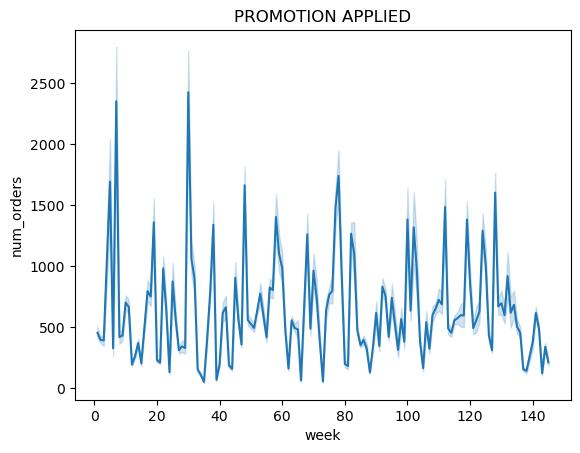

In [30]:
df=promodf
fig=sns.lineplot(df,x='week',y='num_orders').set(title='PROMOTION APPLIED')
fig

[Text(0.5, 1.0, 'homepage featured')]

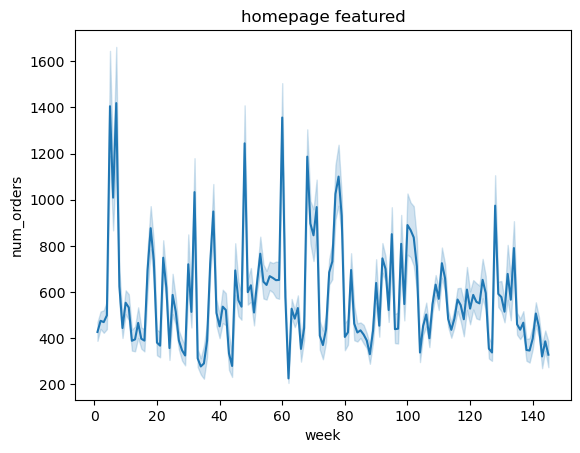

In [31]:
df1=hromodf
fig=sns.lineplot(df1,x='week',y='num_orders').set(title='homepage featured')
fig

Spiliting the data for modeling 

In [33]:
trainfinal1

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type
0,1379560,1,136.83,152.29,0,0,177,0,3,647,56,2
1,1018704,2,135.83,152.29,0,0,323,0,3,647,56,2
2,1196273,3,132.92,133.92,0,0,96,0,3,647,56,2
3,1116527,4,135.86,134.86,0,0,163,0,3,647,56,2
4,1343872,5,146.50,147.50,0,0,215,0,3,647,56,2
...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1437396,141,583.03,630.53,0,1,13,4,0,473,77,0
456544,1060716,142,581.03,582.03,0,0,42,4,0,473,77,0
456545,1029231,143,583.03,581.03,0,0,40,4,0,473,77,0
456546,1141147,144,582.03,581.03,0,0,53,4,0,473,77,0


In [35]:
x=trainfinal1.drop(['num_orders'],axis=1)
y=trainfinal1['num_orders']

In [36]:
from sklearn.model_selection import train_test_split

# Assuming 'x' contains the features and 'y' contains the target variable
# 'test_size=0.20' specifies that 20% of the data will be used for testing, and 80% for training
# 'random_state=0' sets the random seed to ensure reproducibility
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)


In [37]:
x_train

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine,city_code,region_code,center_type
141016,1325459,105,581.03,582.03,0,0,4,0,522,56,0
406574,1485641,125,320.13,320.13,0,0,5,3,526,34,2
189872,1339897,56,534.53,533.53,0,0,6,2,713,85,0
323934,1006827,23,326.89,327.89,0,0,9,2,526,34,2
142275,1357504,40,323.98,324.98,0,0,0,0,615,34,1
...,...,...,...,...,...,...,...,...,...,...,...
152315,1212361,87,485.03,485.03,0,0,1,1,590,56,0
439107,1338177,142,221.22,220.22,0,0,0,2,676,34,1
117952,1186492,23,341.50,408.43,0,1,6,2,596,71,0
435829,1436388,144,321.13,321.13,0,0,5,3,699,85,2


In [38]:
from sklearn.feature_selection import mutual_info_classif
%matplotlib inline
imp=mutual_info_classif(x_train,y_train)
imp

array([0.        , 0.00770457, 0.34746043, 0.30227094, 0.04012643,
       0.0459859 , 0.27992307, 0.07863536, 0.03639182, 0.02401013,
       0.01243481])

<Axes: >

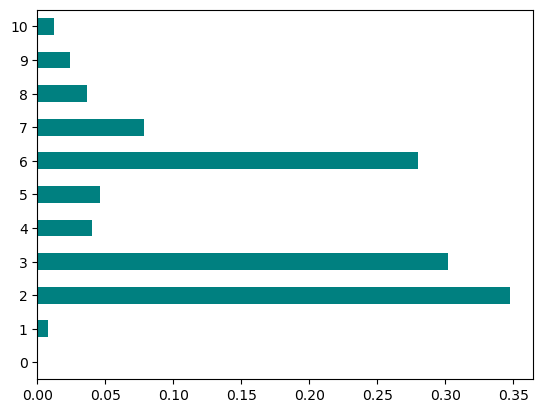

In [39]:
futureim=pd.Series(imp)
futureim.plot(kind='barh',color="teal")

Fitting in the Models

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
model=LinearRegression()
model2=RandomForestRegressor(max_depth=11,random_state=0)
model3=DecisionTreeRegressor(max_depth=11,random_state=0)

Linear Regression

In [41]:
model.fit(x_train,y_train)

LinearRegression()

In [42]:
li=model.predict(x_test)
li[li<0]=0
li

array([289.60194036, 243.5403869 , 388.72269403, ..., 257.96884317,
         0.        , 288.94314784])

In [43]:
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
print('R2 Score:' ,r2_score(y_test,li))
print('Mean Square Error :',mean_squared_error(y_test,li))
print('RMSE :',np.sqrt(mean_squared_error(y_test,li)))
print('RMSLE:',100*np.sqrt(metrics.mean_squared_log_error(y_test,li)))

R2 Score: 0.2221417660477163
Mean Square Error : 123168.8156916749
RMSE : 350.95415041237925
RMSLE: 150.86558891326266


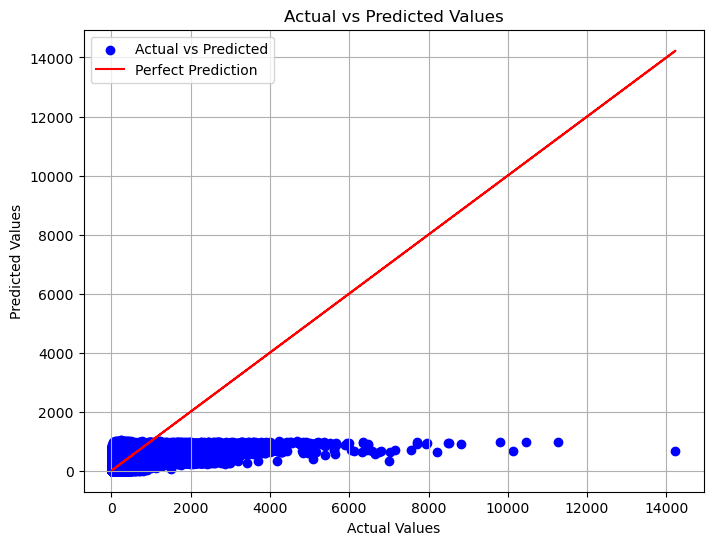

In [44]:
# Sample actual and predicted values
actual_values =y_test
predicted_values =li

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(actual_values, predicted_values, color='blue', label='Actual vs Predicted')
plt.plot(actual_values, actual_values, color='red', label='Perfect Prediction')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


Random forest Regressor

In [45]:
model2.fit(x_train,y_train)

RandomForestRegressor(max_depth=11, random_state=0)

In [65]:
ri=model2.predict(x_test)
ri[ri<0]=0
ri


array([156.31881459, 473.20807061, 591.76310448, ..., 363.62696711,
       112.17571704, 375.58811174])

In [66]:
print('R2 Score:' ,r2_score(y_test,ri))
print('Mean Square Error :',mean_squared_error(y_test,ri))
print('RMSE :',sqrt(mean_squared_error(y_test,ri)))
print('RMSLE:',100*np.sqrt(metrics.mean_squared_log_error(y_test,ri)))

R2 Score: 0.6658045011365812
Mean Square Error : 52917.69374909106
RMSE : 230.03846145610316
RMSLE: 65.73733854507951


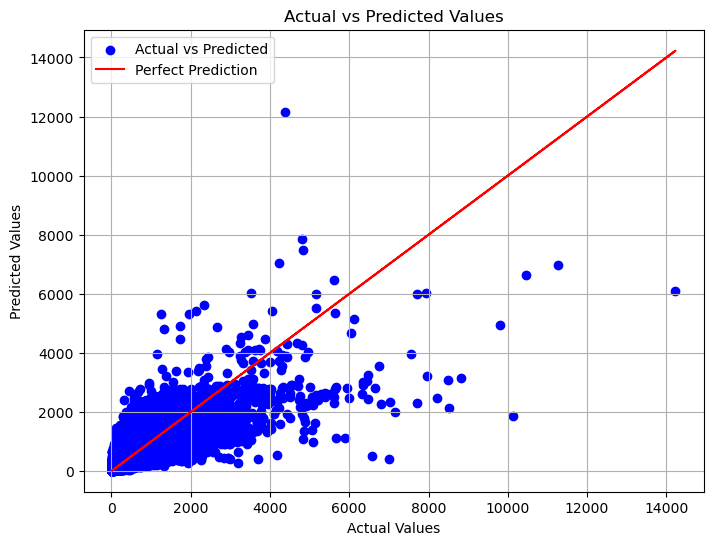

In [67]:
# Sample actual and predicted values
actual_values = y_test
predicted_values = ri

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(actual_values, predicted_values, color='blue', label='Actual vs Predicted')
plt.plot(actual_values, actual_values, color='red', label='Perfect Prediction')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


Decision Tree Regressor

In [40]:
model3.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=11, random_state=0)

In [41]:
vi=model3.predict(x_test)
vi[vi<0]=0
vi

array([162.59375   , 466.660401  , 589.69709544, ..., 366.33004841,
       104.08548387, 366.33004841])

In [42]:
print('R2 Score:' ,r2_score(y_test,vi))
print('Mean Square Error :',mean_squared_error(y_test,vi))
print('RMSE :',sqrt(mean_squared_error(y_test,vi)))
print('RMSLE:',100*np.sqrt(metrics.mean_squared_log_error(y_test,vi)))

R2 Score: 0.6072557227795048
Mean Square Error : 62188.51377216205
RMSE : 249.37624941473888
RMSLE: 66.64777629260303


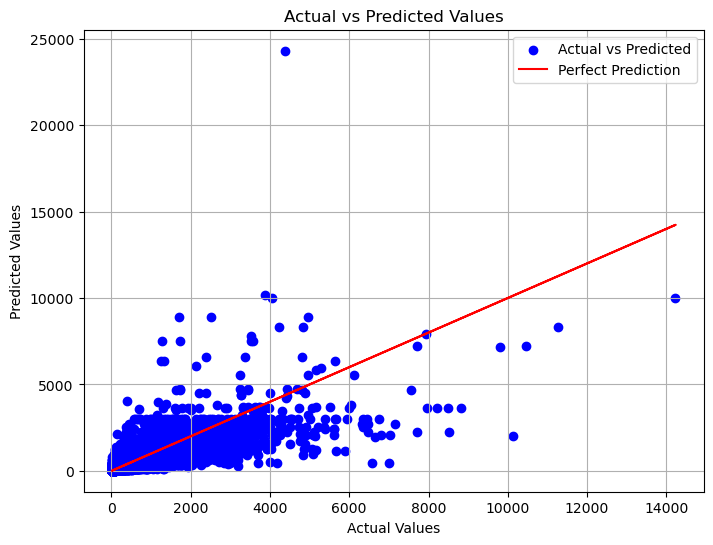

In [43]:
# Sample actual and predicted values
actual_values = y_test
predicted_values = vi

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(actual_values, predicted_values, color='blue', label='Actual vs Predicted')
plt.plot(actual_values, actual_values, color='red', label='Perfect Prediction')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


Gradient Boosting regressor

In [44]:
from sklearn.ensemble import GradientBoostingRegressor

In [45]:
gbm=GradientBoostingRegressor(n_estimators=500, learning_rate=0.1, max_depth=6, random_state=10)

In [46]:
gbm.fit(x_train,y_train)

GradientBoostingRegressor(max_depth=6, n_estimators=500, random_state=10)

In [47]:
hi=gbm.predict(x_test)
hi[hi<0]=0
hi

array([171.07886032, 606.92525476, 287.70798028, ..., 411.45801789,
        81.98672156, 285.04874963])

In [48]:
print('R2 Score:' ,r2_score(y_test,hi))
print('Mean Square Error :',mean_squared_error(y_test,hi))
print('RMSE :',sqrt(mean_squared_error(y_test,hi)))
print('RMSLE:',100*np.sqrt(metrics.mean_squared_log_error(y_test,hi)))

R2 Score: 0.7676434453637244
Mean Square Error : 36792.15620992399
RMSE : 191.81281555183946
RMSLE: 80.3096249389659


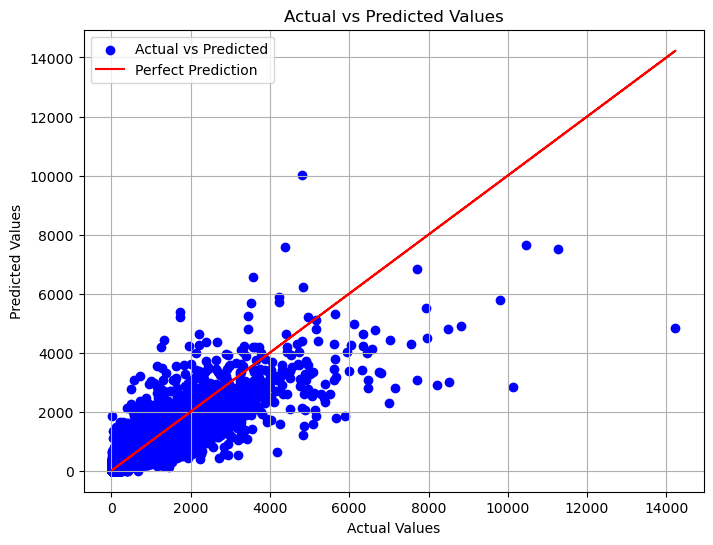

In [49]:
# Sample actual and predicted values
actual_values = y_test
predicted_values = hi
# Plot
plt.figure(figsize=(8, 6))
plt.scatter(actual_values, predicted_values, color='blue', label='Actual vs Predicted')
plt.plot(actual_values, actual_values, color='red', label='Perfect Prediction')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


SAVEING THE MODEL FOR FURTHER PROCESS
RandomForestRegressor has least RMSLE and Better R Squred Value


In [69]:
import pickle
pickle.dump(model2,open('Fooddemand.pkl','wb'))